### Visualization of candidate specimens

In [1]:
library(tidyverse)
library(ggplot2)
# library(gbif.range)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.2     ✔ tibble    3.2.1
✔ lubridate 1.9.4     ✔ tidyr     1.3.1
✔ purrr     1.0.4     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [2]:
# load in specimen data
all_occurrences <- read.csv("./data/BrownUniversity-BRU_DwC-A/occurrences.csv")
specimens <- read.csv("./data/specimens.csv")
sliced <- read.csv("./data/sliced_specimens.csv")

# selected <- read.csv("data/pranav_capstone_samples_2025-sampling_specimens.csv")
selected <- read.csv("data/sequencing_metadata.csv")

In [3]:
# subset to year vectors

# from csv
all_occurrence_years <- na.omit(all_occurrences[-which(all_occurrences$year == 860),]$year)
specimen_years <- na.omit(specimens$year)
sliced_years <- na.omit(sliced$year)

# subset from occurrences
# selected <- selected %>% filter()
# selected_years <- all_occurrences[all_occurrences$catalogNumber %in% selected$catalogNumber,]$year
# selected_years <- na.omit(selected_years)

# NOW: pull years from selected specimens directly from metadata
selected <- selected %>% mutate(year = ifelse(is.na(year), yearEstimate, year))
selected_years <- selected$year

# subset to correctly sequenced
trnl_sequenced_years <- filter(selected, trnL_recovered)$year
rbcl_sequenced_years <- filter(selected, rbcL_recovered)$year
both_sequenced_years <- filter(selected, trnL_recovered & rbcL_recovered)$year

In [4]:
# selected_all <- all_occurrences[all_occurrences$catalogNumber %in% selected$catalogNumber,]
# selected_all <- selected_all %>% select(catalogNumber, scientificName, year)

# write.csv(selected_all, "specimen_years.csv")

In [5]:
ref <- c(min(all_occurrence_years),max(all_occurrence_years))

breaks <- seq(ref[1], ref[2], by = 5)


specimen_bins <- cut(specimen_years, breaks = breaks, right = FALSE)
specimen_years_freq <- as.data.frame(table(factor(specimen_bins, levels = levels(specimen_bins)))) %>% mutate(Freq = (Freq/sum(Freq))*100) %>%
  rename(year = Var1) %>% rename(freq = Freq) %>%
  mutate(year = breaks[-length(breaks)]) %>%
  mutate(group = "SPECIMEN")

# specimen_years_freq

In [6]:
all_bins <- cut(all_occurrence_years, breaks = breaks, right = FALSE)
all_years_freq <- as.data.frame(table(factor(all_bins, levels = levels(all_bins)))) %>% mutate(Freq = (Freq/sum(Freq))*100) %>%
  rename(year = Var1) %>% rename(freq = Freq) %>%
  mutate(year = breaks[-length(breaks)]) %>%
  mutate(group = "ALL")

In [7]:
selected_bins <- cut(selected_years, breaks = breaks, right = FALSE)
selected_years_freq <- as.data.frame(table(factor(selected_bins, levels = levels(selected_bins)))) %>% mutate(Freq = (Freq/sum(Freq))*100) %>%
  rename(year = Var1) %>% rename(freq = Freq) %>%
  mutate(year = breaks[-length(breaks)]) %>%
  mutate(group = "SELECTED")

In [8]:
sliced_bins <- cut(sliced_years, breaks = breaks, right = FALSE)
sliced_years_freq <- as.data.frame(table(factor(sliced_bins, levels = levels(sliced_bins)))) %>% mutate(Freq = (Freq/sum(Freq))*100) %>%
  rename(year = Var1) %>% rename(freq = Freq) %>%
  mutate(year = breaks[-length(breaks)]) %>%
  mutate(group = "SLICED")

In [9]:
plot_df <- rbind(all_years_freq, specimen_years_freq)

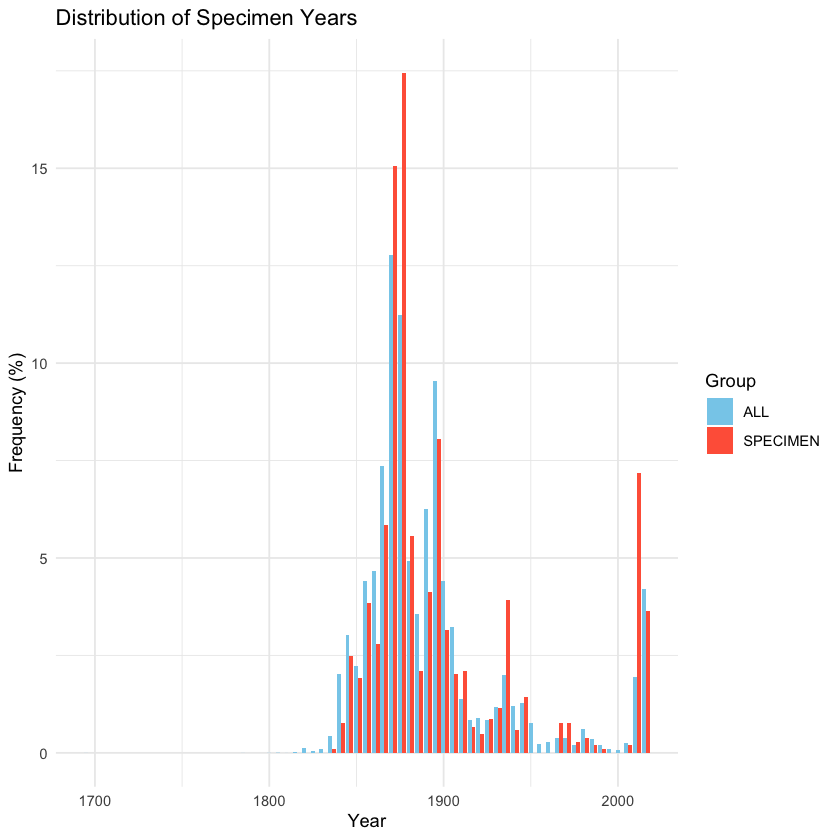

In [10]:
g <- ggplot(plot_df, aes(x = year, y = freq, fill = group)) +
    geom_col(position = "dodge") + 
    scale_fill_manual(values = c("skyblue", "tomato", "springgreen")) +
    labs(title = "Distribution of Specimen Years",
         x = "Year",
         y = "Frequency (%)",
         fill = "Group") +
    theme_minimal()

g

In [11]:
# ggsave(filename = "./figures/dist_years_hist.png", plot = g, height = 4 , width = 8)

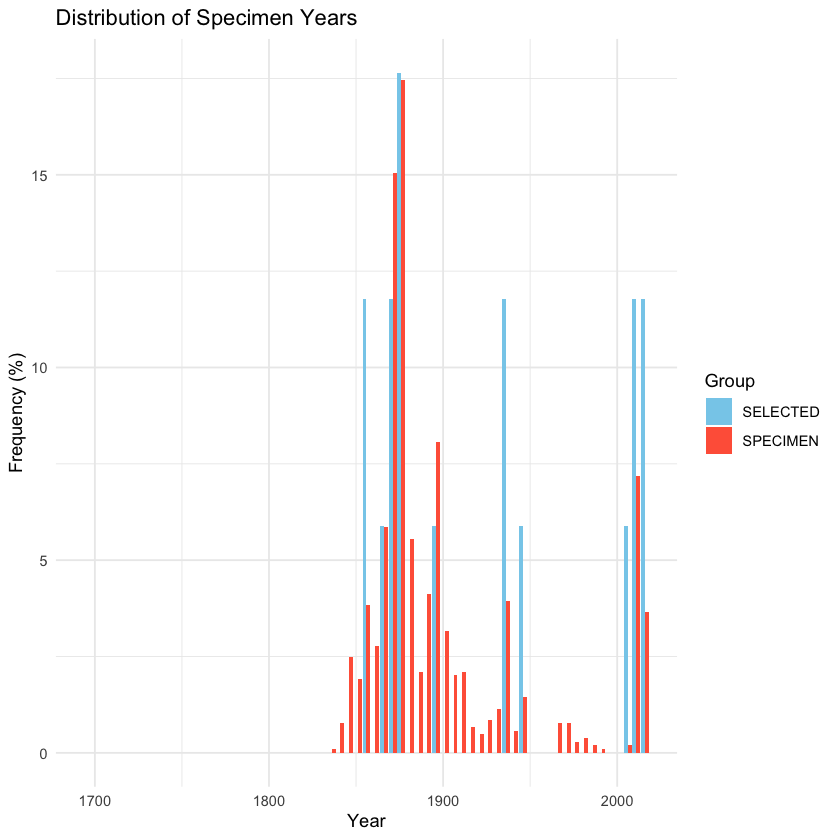

In [12]:
plot_df <- rbind(specimen_years_freq, selected_years_freq)

g <- ggplot(plot_df, aes(x = year, y = freq, fill = group)) +
    geom_col(position = "dodge") + 
    scale_fill_manual(values = c("skyblue", "tomato", "springgreen")) +
    labs(title = "Distribution of Specimen Years",
         x = "Year",
         y = "Frequency (%)",
         fill = "Group") +
    theme_minimal()

g

In [13]:
## FREQUENCY DISTRIBUTION NOT BINNED ##
# ref <- min(all_occurrence_years):max(all_occurrence_years)

# specimen_years_freq <- as.data.frame(table(factor(specimen_years, levels = ref))) %>% mutate(Freq = (Freq/sum(Freq))*100) %>%
#   rename(year = Var1) %>% rename(freq = Freq) %>%
#   mutate(year = as.numeric(as.character(year))) %>%
#   mutate(group = "SPECIMEN")

# # sliced_years_freq <- as.data.frame(table(factor(sliced_years, levels = ref))) %>% mutate(Freq = (Freq/sum(Freq))*100) %>%
# #   rename(year = Var1) %>% rename(freq = Freq) %>%
# #   mutate(year = as.numeric(as.character(year))) %>%
# #   mutate(group = "SELECTED")

# selected_years_freq <- as.data.frame(table(factor(selected_years, levels = ref))) %>% mutate(Freq = (Freq/sum(Freq))*100) %>%
#   rename(year = Var1) %>% rename(freq = Freq) %>%
#   mutate(year = as.numeric(as.character(year))) %>%
#   mutate(group = "SELECTED")

# all_years_freq <- as.data.frame(table(factor(all_occurrence_years, levels = ref))) %>% mutate(Freq = (Freq/sum(Freq))*100) %>%
#   rename(year = Var1) %>% rename(freq = Freq) %>%
#   mutate(year = as.numeric(as.character(year))) %>%
#   mutate(group = "ALL")

# plot_df <- rbind(specimen_years_freq, selected_years, all_years_freq)

In [14]:
plot_df <- data.frame(
  value = c(all_occurrence_years, specimen_years, sliced_years, selected_years, both_sequenced_years),
  group = factor(c(rep("ALL", length(all_occurrence_years)), rep("NO BARCODE", length(specimen_years)), 
  rep("CANDIDATE", length(sliced_years)), rep("SELECTED", length(selected_years)), rep("SEQ_RECOVERED", length(both_sequenced_years))))
)

In [15]:
plot_df <- data.frame(
  value = c(all_occurrence_years, specimen_years, selected_years, trnl_sequenced_years, rbcl_sequenced_years, both_sequenced_years),
  group = factor(c( 
  rep("ALL", length(all_occurrence_years)), rep("NO BARCODE", length(specimen_years)), 
  rep("SELECTED", length(selected_years)), rep("TRNL_RECOVERED", length(trnl_sequenced_years)), 
  rep("RBCL_RECOVERED", length(rbcl_sequenced_years)), rep("BOTH_RECOVERED", length(both_sequenced_years))),
  levels = c("ALL", "NO BARCODE", "SELECTED", "TRNL_RECOVERED", "RBCL_RECOVERED", "BOTH_RECOVERED")
  )
)

In [16]:
plot_df %>% group_by(group) %>% slice(1)

value,group
<int>,<fct>
1861,ALL
2020,NO BARCODE
2015,SELECTED
2015,TRNL_RECOVERED
2015,RBCL_RECOVERED
2015,BOTH_RECOVERED


In [17]:
# library(ggplot2)

## JUST YEARS HISTOGRAM ##

# ggplot(plot_df, aes(x = value, fill = group)) +
#   geom_histogram(position = "dodge", alpha = 0.7) +
#   scale_fill_manual(values = c("skyblue", "tomato", "springgreen")) +
#   labs(title = "Histogram of Specimen Years",
#        x = "Year",
#        y = "Count")
# # par(mfrow=c(2,1))
# # hist(all_occurrences_years, breaks = 50)
# # hist(specimen_years, breaks = 50)
# # hist(sliced_years, breaks = 50)

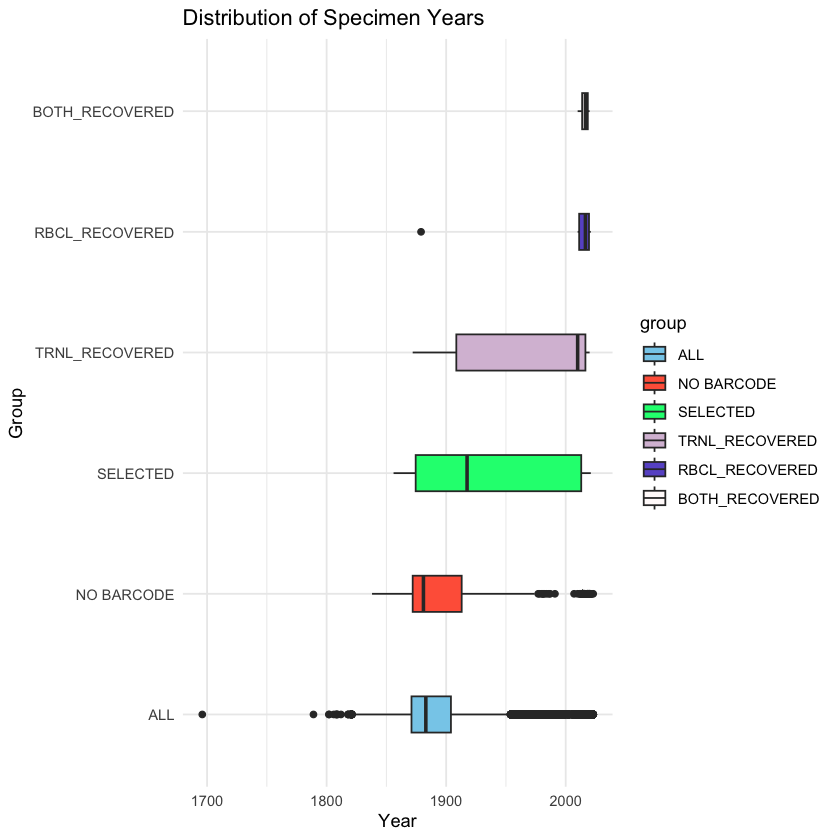

In [18]:
# all_occurrence_years <- na.omit(all_occurrences[-which(all_occurrences$year == 860),]$year)
# specimen_years <- na.omit(specimens$year)

# selected_years <- all_occurrences[all_occurrences$catalogNumber %in% selected$catalogNumber,]$year
# selected_years <- na.omit(selected_years)

# $FIXME: Get useable sequence list and transform
# sequenced_years <- 


# plot_df <- data.frame(
#   value = c(all_occurrence_years, specimen_years, selected_years),
#   group = factor(c(rep("ALL", length(all_occurrence_years)), rep("NO BARCODE", length(specimen_years)), rep("SELECTED", length(selected_years))))
# )

# using ggplot2
g <- ggplot(plot_df, aes(x = group, y = value, fill = group)) +
  geom_boxplot(width = 0.3) +
  scale_fill_manual(values = c("skyblue", "tomato", "springgreen", "thistle", "slateblue", "snow")) +
  labs(title = "Distribution of Specimen Years",
       x = "Group",
       y = "Year") +
  coord_flip() +  # Makes the boxplots horizontal
  theme_minimal()

g


In [19]:
# ggsave(filename = "./figures/box_seq_years.png", plot = g, height = 4 , width = 8)

In [20]:
dna_years <- selected %>% select(year, trnL_dna_concentration, rbcL_dna_concentration) %>% 
rename("trnL" = trnL_dna_concentration, "rbcL" = rbcL_dna_concentration) %>%
filter(!is.na(trnL) | !is.na(rbcL)) %>% 
pivot_longer(cols = c(trnL, rbcL)) %>% rename("group" = name) %>%
mutate(group = factor(group, levels = c("trnL", "rbcL"))) %>%
filter(!is.na(value))

dna_years

year,group,value
<int>,<fct>,<dbl>
1879,trnL,2.540
1879,rbcL,3.380
2021,trnL,4.560
2014,trnL,4.340
2014,rbcL,3.320
1860,trnL,4.880
1874,trnL,3.880
1870,trnL,5.060
1870,rbcL,3.320


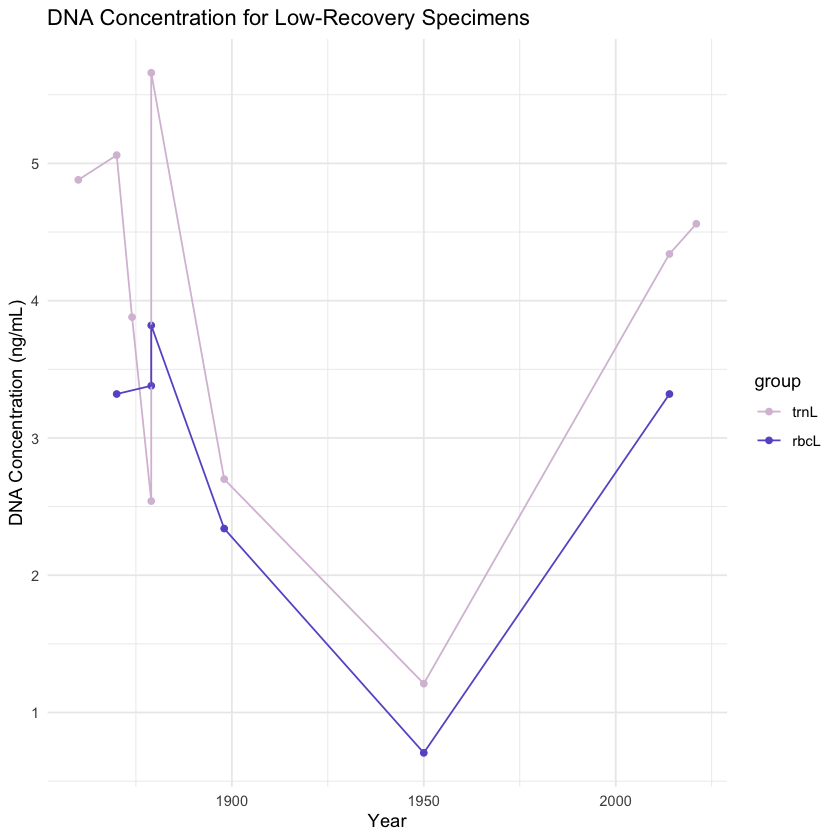

In [21]:
g <- ggplot(dna_years, aes(x = year, y = value, fill = group, color = group)) +
    geom_point() +
    geom_line() +
    scale_color_manual(values = c("thistle", "slateblue")) +
    labs(title = "DNA Concentration for Low-Recovery Specimens",
       x = "Year",
       y = "DNA Concentration (ng/mL)") +
    theme_minimal()

g

In [23]:
# ggsave(filename = "./figures/dna_c_plot.png", plot = g, height = 4 , width = 6)

In [31]:
trnl_lengths <- data.frame(
catalogNumber = c('PBRU00041911', 'PBRU00077056', 'PBRU00021776', 'PBRU00047050', 
'PBRU00050298', 'PBRU00078736', 'PBRU00055711', 'PBRU00064307', 'PBRU00071780'),
length = c(443, 444, 484, 484, 469, 494, 471, 468, 468)
)

trnl_lengths <- left_join(trnl_lengths, selected, by = "catalogNumber") %>% select(catalogNumber, length, year) %>%
mutate(group = "trnL")


rbcl_lengths <- data.frame(
catalogNumber = c('PBRU00064538', 'PBRU00025308', 'PBRU00077056', 'PBRU00073743', 
'PBRU00064307', 'PBRU00071780', 'PBRU00050298', 'PBRU00078736', 'PBRU00055711', 'PBRU00047866'),
length = c(400, 400, 408, 457, 422, 465, 474, 480, 260, 290)
)

rbcl_lengths <- left_join(rbcl_lengths, selected, by = "catalogNumber") %>% select(catalogNumber, length, year) %>%
mutate(group = "rbcL")



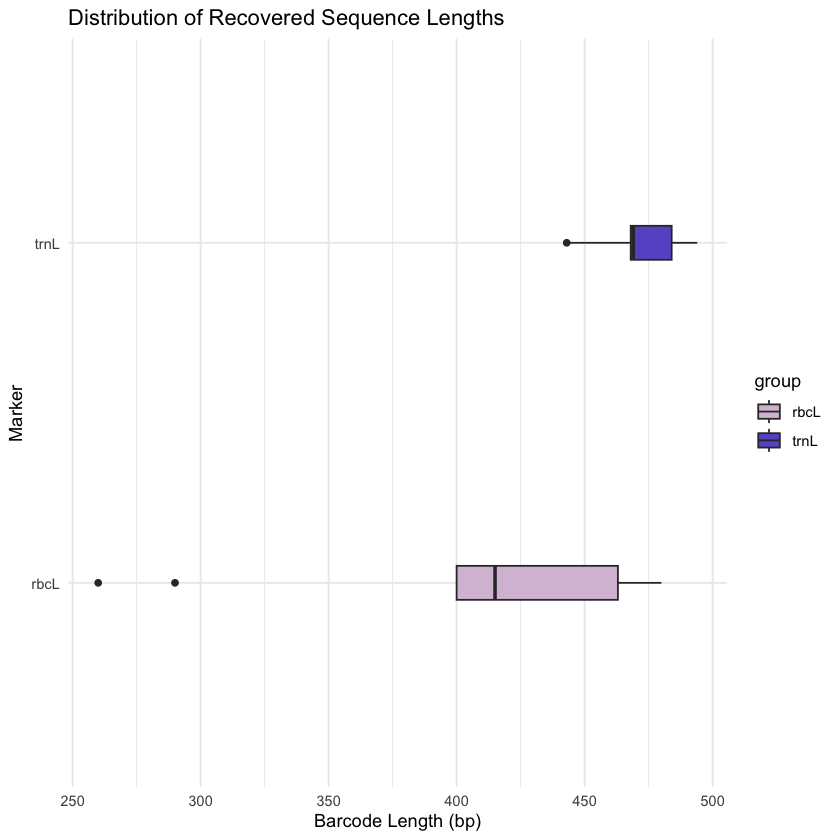

In [32]:
plot_df <- rbind(trnl_lengths, rbcl_lengths)

g <- ggplot(plot_df, aes(x = group, y = length, fill = group)) +
  geom_boxplot(width = 0.1) +
  scale_fill_manual(values = c("thistle", "slateblue")) +
  labs(title = "Distribution of Recovered Sequence Lengths",
       x = "Marker",
       y = "Barcode Length (bp)") +
  coord_flip() +
  theme_minimal()

g


In [ ]:
# ggsave(filename = "./figures/barcode_length_plot.png", plot = g, height = 4, width = 8)

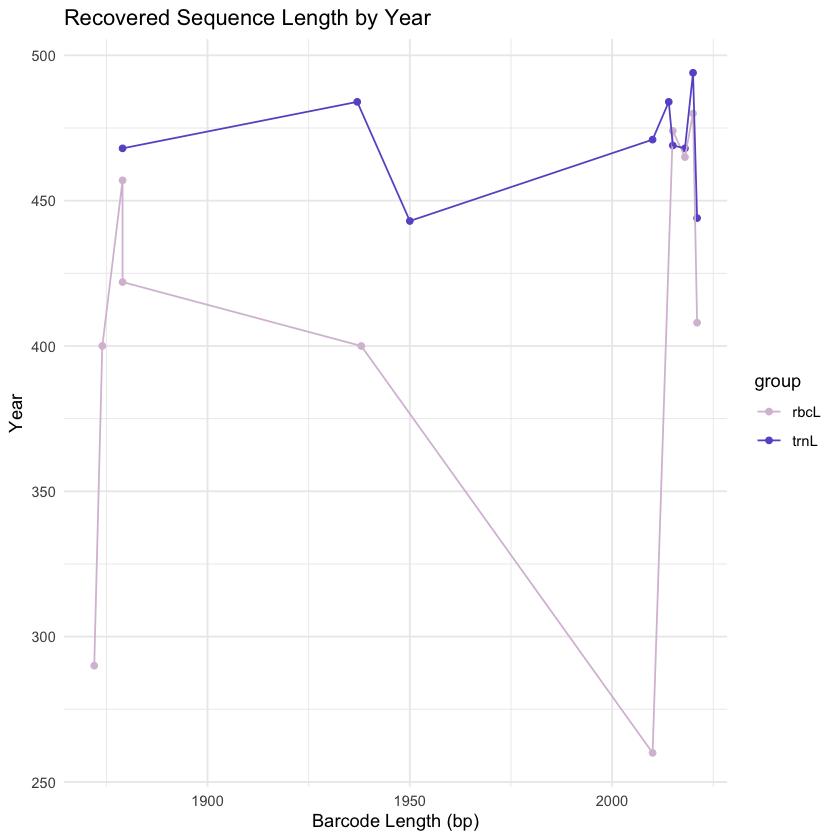

In [33]:
g <- ggplot(plot_df, aes(x = year, y = length, color = group)) +
  geom_point() +
  geom_line() +
  scale_color_manual(values = c("thistle", "slateblue")) +
  labs(title = "Recovered Sequence Length by Year",
       x = "Barcode Length (bp)",
       y = "Year") +
  theme_minimal()

g

In [34]:
ggsave(filename = "./figures/recovered_seq_len_plot.png", plot = g, height = 4 , width = 6)